# Power Consumption

Calculate and plot power consumption data from oscilloscope measurements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams, cycler
from matplotlib.ticker import MultipleLocator

In [2]:
# change deafult matplotlib colors
# rcParams['axes.prop_cycle'] = cycler(color=['#0471A6', '#C44536', '#02B188']) 

# change font
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
# rc('text', usetex=True)

In [3]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')#, color='#40c6cc')


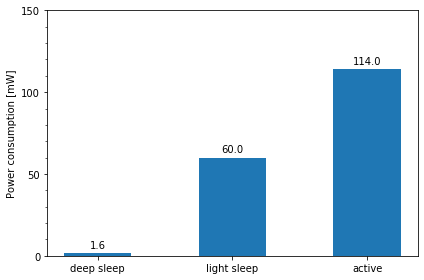

In [4]:
x = ('deep sleep', 'light sleep', 'active')
y = [1.6, 60, 114]

ind = np.arange(3)  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, y, width)

ax.set_ylabel('Power consumption [mW]')
ax.set_xticks(ind)
ax.set_xticklabels(x)

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.ylim(top=150)

autolabel(rects1, "center")
fig.tight_layout()

# plt.savefig('esp_power.pdf', bbox_inches='tight', dpi=300)

# change color

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')

# plt.title('Beacon idle power for ESP32 sleep modes')
# plt.savefig('esp_power.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

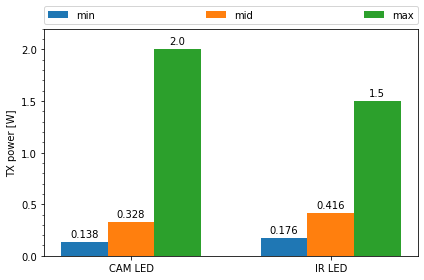

In [5]:

b_min = [0.138, 0.176]
b_mid = [0.328, 0.416]
b_max = [2, 1.5]

ind = np.arange(2)*1.5  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, b_min, width, label='min')
rects2 = ax.bar(ind, b_mid, width, label='mid')
rects3 = ax.bar(ind + width, b_max, width, label='max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('TX power [W]')
ax.set_xticks(ind)
ax.set_xticklabels(('CAM LED', 'IR LED'))


ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
plt.ylim(top=2.2)

legend = ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc='lower left',ncol=3, mode="expand", borderaxespad=0.)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

# change color

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')


# plt.savefig('led_power.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

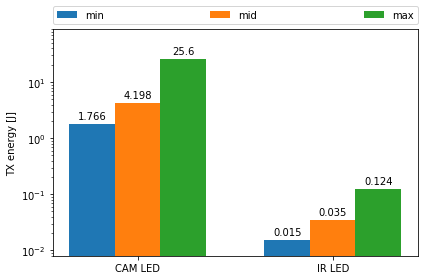

In [6]:

duration_ir_s = 0.0135 + 62 * 0.00056 *2
duration_cam_s = 64*0.2

ndigits = 3
p_min = [round(0.138*duration_cam_s,ndigits), round(0.176*duration_ir_s,ndigits)]
p_mid = [round(0.328*duration_cam_s,ndigits), round(0.416*duration_ir_s,ndigits)]
p_max = [round(2*duration_cam_s,ndigits), round(1.5*duration_ir_s,ndigits)]

ind = np.arange(2)*1.5  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, p_min, width, label='min')
rects2 = ax.bar(ind, p_mid, width, label='mid')
rects3 = ax.bar(ind + width, p_max, width, label='max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('TX energy [J]')
ax.set_xticks(ind)
ax.set_xticklabels(('CAM LED', 'IR LED'))


ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax.set_yscale('log')
plt.ylim(0.008,90)

legend = ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc='lower left',ncol=3, mode="expand", borderaxespad=0.)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

# plt.savefig('led_energy.pdf', bbox_inches='tight', dpi=300)

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')

# plt.savefig('led_energy.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()

In [7]:
battery_wh = 19.2 #25.53
esp_p = 0.0016
led_cam_p = 2#0.328
led_ir_p = 1.5

period_cam_minutes = 60
period_ir_minutes = 1


def battery_life_days(battery_wh, esp_p, led_cam_p, led_ir_p, period_cam_minutes, period_ir_minutes):
    duration_ir_s = 0.0135 + 62 * 0.00056 *2
    duration_cam_s = 64*0.2


    dur_cam_per_hour = 60 / period_cam_minutes * duration_cam_s / 3600 
    dur_ir_per_hour = 60 / period_ir_minutes * duration_ir_s / 3600 

    led_cam_power_per_hour = dur_cam_per_hour * led_cam_p
    led_ir_power_per_hour = dur_ir_per_hour * led_ir_p
    esp_power_per_hour = (1 - dur_cam_per_hour - dur_ir_per_hour) * esp_p

    life_hours = battery_wh / (led_cam_power_per_hour + led_ir_power_per_hour + esp_power_per_hour)
    return life_hours / 24

battery_life_days(battery_wh, esp_p, led_cam_p, led_ir_p, period_cam_minutes, period_ir_minutes)  

74.23415529486701

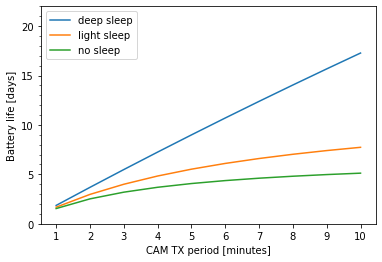

In [8]:
battery_wh = 19.2 #25.53
esp_p = 0.0016
led_cam_p = 2#0.328
led_ir_p = 1.5

period_cam_minutes = 60
period_ir_minutes = 1

period = np.arange(1,11)
life_deep = np.zeros(len(period))
life_light = np.zeros(len(period))
life_none = np.zeros(len(period))

for i, p in enumerate(period):
    life_deep[i] = battery_life_days(battery_wh, 0.0016, led_cam_p, led_ir_p, p, period_ir_minutes)  
    life_light[i] = battery_life_days(battery_wh, 0.06, led_cam_p, led_ir_p, p, period_ir_minutes)  
    life_none[i] = battery_life_days(battery_wh, 0.114, led_cam_p, led_ir_p, p, period_ir_minutes) 



plt.plot(period, life_deep, label='deep sleep')
plt.plot(period, life_light, label='light sleep')
plt.plot(period, life_none, label='no sleep')
ax = plt.gca()

ax.set_xlabel('CAM TX period [minutes]')
ax.set_ylabel('Battery life [days]')
legend = plt.legend()

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.ylim(0,22)

# plt.savefig('battery_life_cam_max.pdf', bbox_inches='tight', dpi=300)

# change color

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')

# plt.title('Beacon battery life (CAM LED max)')
# plt.savefig('battery_life_cam_max.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()

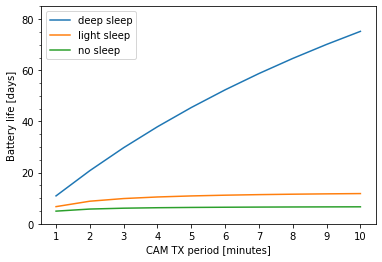

In [9]:
battery_wh = 19.2 #25.53
esp_p = 0.0016
led_cam_p = 0.328
led_ir_p = 1.5

period_cam_minutes = 60
period_ir_minutes = 1

period = np.arange(1,11)
life_deep = np.zeros(len(period))
life_light = np.zeros(len(period))
life_none = np.zeros(len(period))

for i, p in enumerate(period):
    life_deep[i] = battery_life_days(battery_wh, 0.0016, led_cam_p, led_ir_p, p, period_ir_minutes)  
    life_light[i] = battery_life_days(battery_wh, 0.06, led_cam_p, led_ir_p, p, period_ir_minutes)  
    life_none[i] = battery_life_days(battery_wh, 0.114, led_cam_p, led_ir_p, p, period_ir_minutes) 
    
    
plt.plot(period, life_deep, label='deep sleep')
plt.plot(period, life_light, label='light sleep')
plt.plot(period, life_none, label='no sleep')
ax = plt.gca()

ax.set_xlabel('CAM TX period [minutes]')
ax.set_ylabel('Battery life [days]')
legend = plt.legend()
plt.ylim(0,85)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.savefig('battery_life_cam_mid.pdf', bbox_inches='tight', dpi=300)

# change color

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')

# plt.title('Beacon battery life (CAM LED mid)')
# plt.savefig('battery_life_cam_mid.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

## LED current

In [10]:
file_path = 'data/8V/led turn on off/F0000CH1.CSV'

In [11]:
df = pd.read_csv(file_path, names=['c1','c2','c3','time','x','c4'], usecols=['time','x'])
df['time'] -= df['time'].iloc[0]
df['time'] *= 10e5
df['x'] /= 0.5

df['ideal'] = 0
df.loc[df['x']>0.02, 'ideal'] = 1

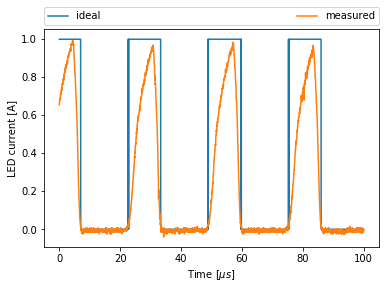

In [12]:

plt.plot(df['time'], df['ideal'], label='ideal')
plt.plot(df['time'], df['x'], label='measured')
plt.xlabel('Time [$\mu s$]')
plt.ylabel('LED current [A]')

ax = plt.gca()
legend = ax.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
# plt.savefig('led_current.png', bbox_inches='tight', dpi=300)

# change color

# axes_color = '#40c6cc'
# ax.spines['bottom'].set_color(axes_color)
# ax.spines['top'].set_color(axes_color)
# ax.spines['left'].set_color(axes_color)
# ax.spines['right'].set_color(axes_color)
# ax.xaxis.label.set_color(axes_color)
# ax.tick_params(axis='x', colors=axes_color, which='both')
# ax.yaxis.label.set_color(axes_color)
# ax.tick_params(axis='y', colors=axes_color, which='both')
# ax.title.set_color(axes_color)
# plt.setp(legend.get_texts(), color=axes_color)
# legend.get_frame().set_edgecolor(axes_color)
# legend.get_frame().set_facecolor('none')


# plt.savefig('led_current.png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()